# Практика 1. Моделювання броунівського руху

Більше про оформлення графіків можна прочитати тут:
[https://r-coder.com/plot-r/#Change_axis_tick-marks ](https://r-coder.com/plot-r/#Change_axis_tick-marks)

Почнемо з моделювання броунівського руху. Для того, щоб контролювати розмір картинки, застосуємо наступну функцію: 

In [1]:
# dev.new(width=6, height=5, unit="cm")
options(repr.plot.width = 6, repr.plot.height = 4)

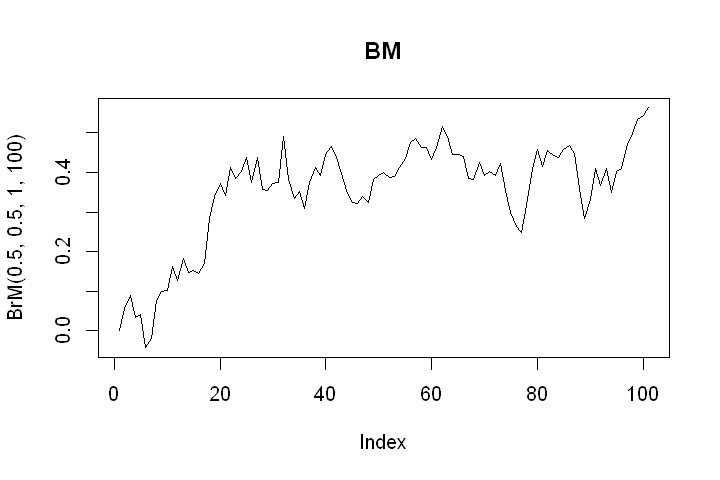

In [18]:
BrM = function(mu,sigma, T, N) {h=T/N
                              t=(0:T)/N
                              X=rep(0, N+1)
                              X[1]=0
                              for(i in 1:N) { X[i+1]=X[i] +mu*h+sigma* sqrt(h)*rnorm(1)}
                              return(X)
}

plot(BrM(0.5, 0.5, 1, 100), type = "l", main = "BM")

Подивимось, як змінюється траєкторія броунівського руху при зміні параметрів. 
Будемо змінювати 
$\mu$ та $\sigma^2$. 

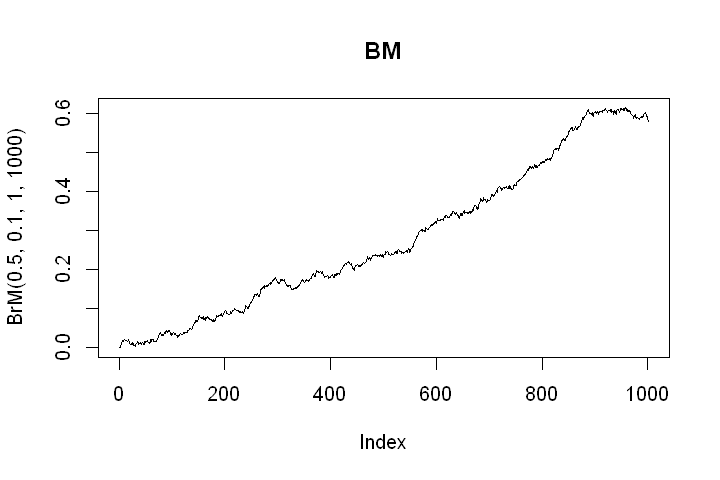

In [20]:
plot(BrM(0.5, 0.1, 1, 1000), type = "l", main = "BM")

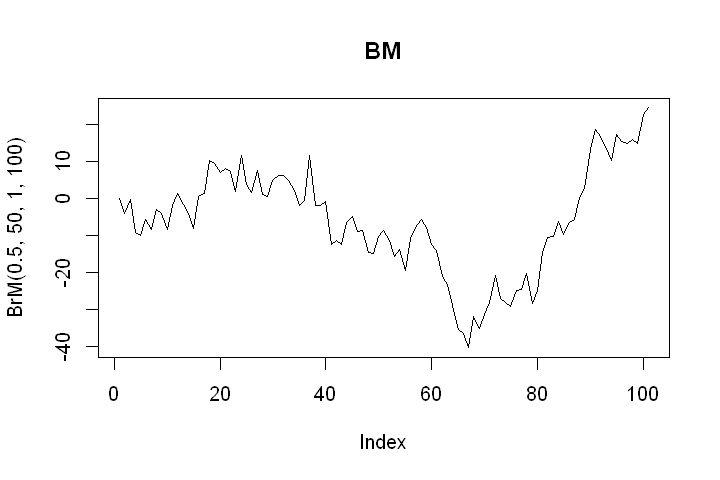

In [22]:
plot(BrM(0.5, 50, 1, 100), type = "l", main = "BM") 

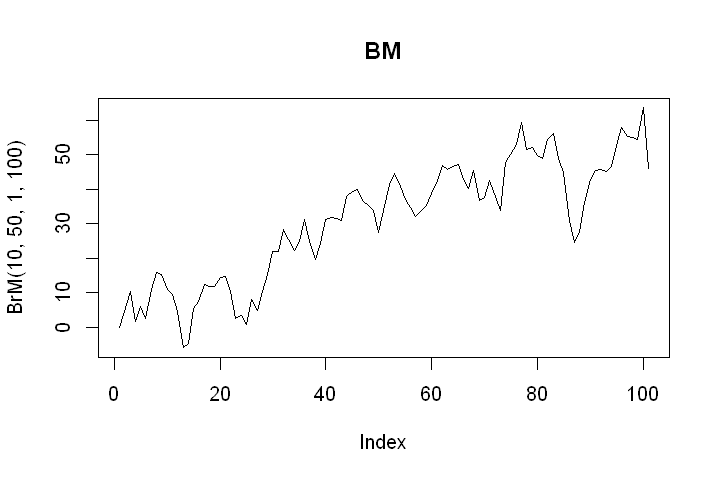

In [5]:
plot(BrM(10, 50, 1, 100), type = "l", main = "BM")

Можна також застосувати функцію cumsum. Побудуємо броунівський рух, задавши вектор зі 100 точок, згенерованих як нормальні випадкові величини з параметрами 0 та $h$. $\sqrt{h} N(0,1)= N(0,h)$

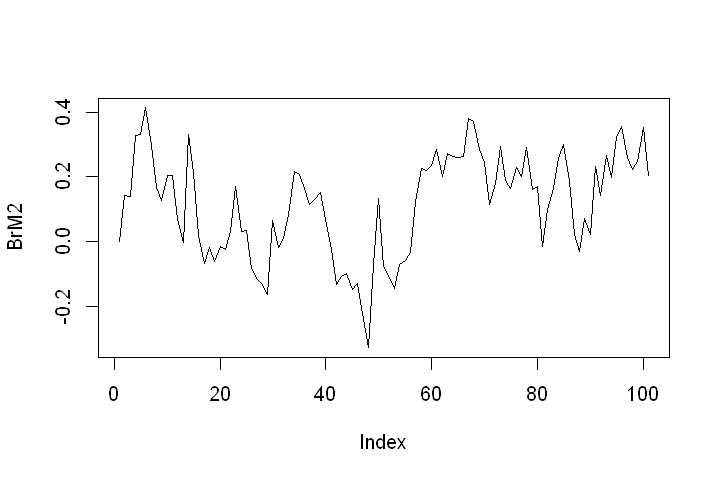

In [23]:
h=1/100
N=100
BrM2= c(0,cumsum(sqrt(h)*rnorm(N)))
plot(BrM2,type="l")

Можна також змоделювати траєкторію $B_t$, використовуючи вбудовані  в $R$ функції $BM()$ та  $ABM()$ відповідно.

$$
Y_t = \theta t + \sigma B_t. 
$$

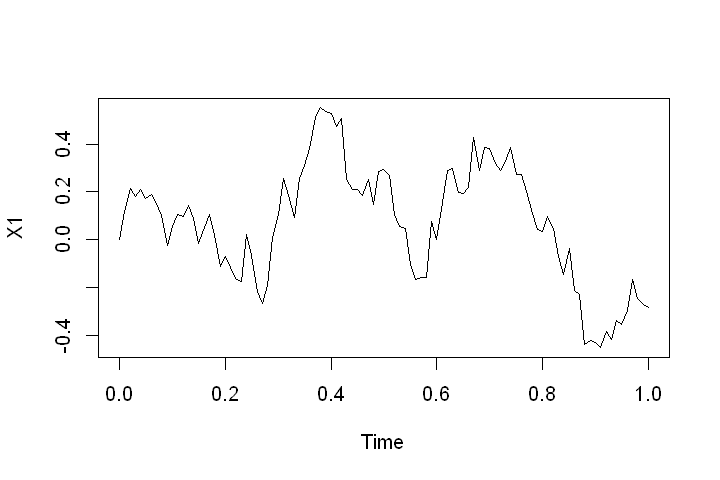

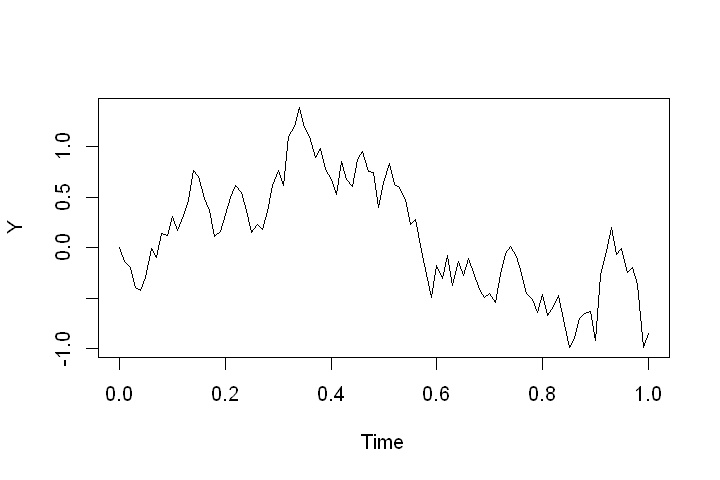

In [24]:
#install.packages("Sim.DiffProc")
library("Sim.DiffProc")

X <- BM(N =100,M=1,x0=0,t0=0,T=1,Dt=NULL)
plot(X)

Y <- ABM(N =100, M = 1, x0=0, t0=0,T=1,Dt=NULL, theta=1, sigma=2)
plot(Y)

Подивимось, як впливають значення $\mu$  та $\sigma$  на траєкторію процесу.  

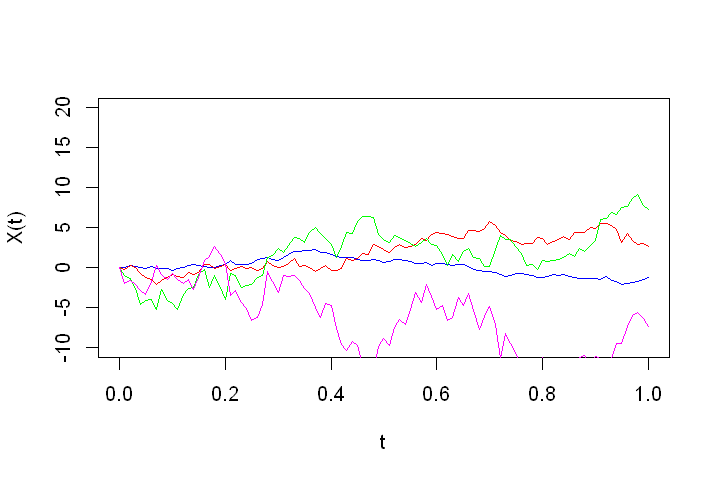

In [25]:
plot(ABM(N =100, M = 1, x0=0, t0=0,T=1,Dt=NULL, theta=0, sigma=2), type = "l", ylim=c(-10,20), xlab="t", ylab="X(t)", col= "blue", main="")
lines(ABM(N =100, M = 1, x0=0, t0=0,T=1,Dt=NULL, theta=0, sigma=5), type = "l", col= "red")
lines(ABM(N =100, M = 1, x0=0, t0=0,T=1,Dt=NULL, theta=3, sigma=10), type = "l", col= "green")
lines(ABM(N =100, M = 1, x0=0, t0=0,T=1,Dt=NULL, theta=3, sigma= 15), type = "l", col= "magenta")

Намалюємо тепер велику кількість однакових траєкторій. 

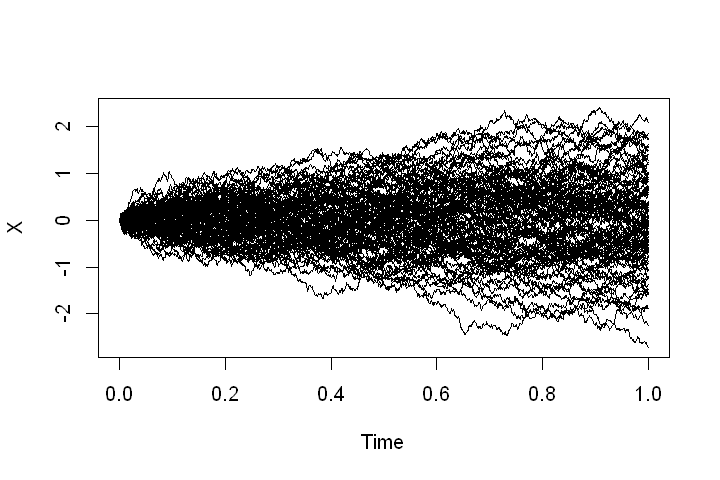

In [9]:
X<-BM(N =1000,M=100,x0=0,t0=0,T=1,Dt=NULL)
plot(X,plot.type="single")

Можна помітити, що ''майже всі'' траєкторії знаходяться всередині огинаючої. Форма цієї огинаючої відома  і випливає із закону повторного логарифму:
\begin{equation}
	\limsup_{t\to \infty}\frac{B_t}{\sqrt{2t\ln\ln t }} =1, \quad \liminf_{t\to \infty}\frac{B_t}{\sqrt{2t\ln\ln t }} =-1, \quad \text{м.н.}
\end{equation}